# 1. EFFECTIVENESS OF THE ONLINE LEARNING RULE

## Setup the environment

#### Adding the source code path

In [2]:
import sys  
sys.path.insert(1, './../../../ESN-IP/IP/.')

In [3]:
import random
import torch
random.seed(50)

#### Import experiment data 

In [4]:
from DATA import NARMA10

data = NARMA10(True, [80,0,20])

X_TR, Y_TR = data.TR()
X_VAL, Y_VAL = data.VAL()
X_TS, Y_TS = data.TS()

## NOT PRETRAINED RESERVOIR

In [5]:
N_UNITS = 100

In [6]:
W_range=(-0.5, 0.5)
initial_rho = 0.5
desired_rhos = [0.95, 0.95, 0.95, 0.95]
bias_range = [-0.1, 0.1]

In [19]:
from IPReservoir import IPReservoir
from ESN import Reservoir
from IntrinsicPlasticity import IPMask

simple_reservoir = Reservoir(N = N_UNITS, ro_rescale = 0.85, bias = True, W_range=(-0.8, 0.8), activation=torch.nn.Tanh())

W_x = simple_reservoir.W_x
W_u = simple_reservoir.W_u
b_x = simple_reservoir.b_x
b_u = simple_reservoir.b_u

In [8]:
from IPReservoir import IPReservoir
from ESN import Reservoir
from IntrinsicPlasticity import IPMask

simple_reservoir = Reservoir(N = N_UNITS, ro_rescale = 0.85, bias = True, W_range=(-0.8, 0.8), activation=torch.nn.Identity())

W_x = simple_reservoir.W_x
W_u = simple_reservoir.W_u
b_x = simple_reservoir.b_x
b_u = simple_reservoir.b_u

## EVAUALTUION IN ESN

In [20]:
from ESN import EchoStateNetwork

simple_esn = EchoStateNetwork(simple_reservoir)
simple_esn.reservoir.reset_initial_state()
simple_esn.train(X_TR, Y_TR, 0)

Reservoir warmed up with the first 100 time steps


array([0.2526245 , 0.25653076, 0.24468994, ..., 0.30169678, 0.26739502,
       0.25335693], dtype=float32)

### COMPARISON ON TEST DATA

In [21]:
from Metrics import NRMSE, MSE

NORMALIZED ROOT-MEAN SQUARE ERROR: 0.021480075075230948


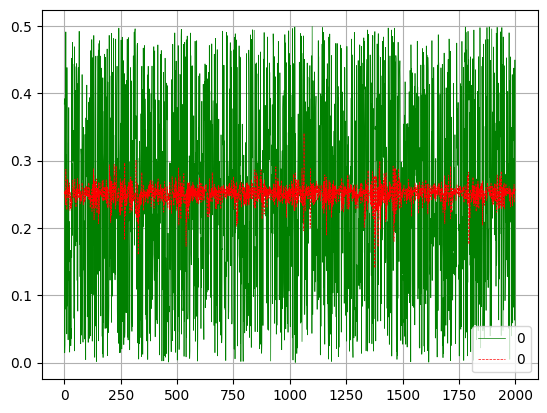

In [22]:
print(f"NORMALIZED ROOT-MEAN SQUARE ERROR: { simple_esn.evaluate(X_TS, Y_TS, metric=MSE(), plot=True)}" )

## MEMORY CAPACITY

In [23]:
simple_esn.MemoryCapacity()

C:\Users\casa_\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=6.15506e-09): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\casa_\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=6.16932e-09): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\casa_\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=6.16851e-09): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\casa_\AppData\Lo

tensor(9.7154)

## LYAPUNOV EXPONENTS

In [25]:
simple_esn.reservoir.LCE(X_TS)

-0.17880222

## DEVIATION FROM LINEARITY

In [18]:
simple_esn.reservoir.de_fi()

0.04293199392854998